## About H&M Dataset
H&M is a popular fashion retailer. Their dataset typically contains information about:

- Products: clothes, accessories, and their details
- Customers: shopping behavior and preferences
- Transactions: what people bought and when

In [1]:
# Import the tools we need
import pandas as pd           # For working with data tables
import numpy as np           # For math operations
import matplotlib.pyplot as plt  # For creating charts
import seaborn as sns        # For pretty charts

# Set up our charts to look nice
plt.style.use('default')
sns.set_palette("husl")

# Load the data files
# Note: You'll need to download these from Kaggle first
transactions = pd.read_csv('transactions_train.csv')
customers = pd.read_csv('customers.csv')
articles = pd.read_csv('articles.csv')

print("Data loaded successfully!")

Data loaded successfully!


## Understanding Our Data Size
**What this tells us**
: How much data we're working with.

In [2]:
print("Dataset Sizes:")
print(f"Transactions: {transactions.shape[0]:,} rows, {transactions.shape[1]} columns")
print(f"Customers: {customers.shape[0]:,} rows, {customers.shape[1]} columns") 
print(f"Articles: {articles.shape[0]:,} rows, {articles.shape[1]} columns")

Dataset Sizes:
Transactions: 31,788,324 rows, 5 columns
Customers: 1,371,980 rows, 7 columns
Articles: 105,542 rows, 25 columns


## Looking at Our Data Structure
**What this tells us**
: What our data looks like

In [3]:
print("TRANSACTIONS DATA - First 5 rows:")
transactions.head()

TRANSACTIONS DATA - First 5 rows:


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
print("CUSTOMERS DATA - First 5 rows:")  
customers.head()

CUSTOMERS DATA - First 5 rows:


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
print("ARTICLES DATA - First 5 rows:")
articles.head()

ARTICLES DATA - First 5 rows:


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [6]:
def check_data_health(df, name):
    print(f"\n{name}")
    print(f"Shape: {df.shape}")
    
    # Count missing values per column
    missing = df.isnull().sum()
    
    # Filter only columns with missing values
    missing = missing[missing > 0]
    
    if not missing.empty:
        print("Missing values:")
        for col, count in missing.items():
            print(f" - {col}: {count}")
    else:
        print("No missing values.")

# Check each dataset
check_data_health(transactions, "TRANSACTIONS")
check_data_health(customers, "CUSTOMERS")
check_data_health(articles, "ARTICLES")



TRANSACTIONS
Shape: (31788324, 5)
No missing values.

CUSTOMERS
Shape: (1371980, 7)
Missing values:
 - FN: 895050
 - Active: 907576
 - club_member_status: 6062
 - fashion_news_frequency: 16011
 - age: 15861

ARTICLES
Shape: (105542, 25)
Missing values:
 - detail_desc: 416


In [ ]:
def remove_missing_rows(df, name):
    missing_rows = df.isnull().any(axis=1).sum()
    
    if missing_rows > 0:
        print(f"\n REMOVING ROWS WITH MISSING VALUES FROM {name}:")
        print(f"Rows to drop: {missing_rows}")
        df = df.dropna()
    else:
        print(f"\n No rows with missing values in {name}. Nothing to drop.")
    
    return df

check_data_health(customers, "CUSTOMERS")
customers= remove_missing_rows(customers, "CUSTOMERS")
check_data_health(customers, "CUSTOMERS")



CUSTOMERS
Shape: (1371980, 7)
Missing values:
 - FN: 895050
 - Active: 907576
 - club_member_status: 6062
 - fashion_news_frequency: 16011
 - age: 15861

🧹 REMOVING ROWS WITH MISSING VALUES FROM CUSTOMERS:
Rows to drop: 909070

CUSTOMERS
Shape: (462910, 7)
No missing values.


In [ ]:
check_data_health(articles, "ARTICLES")
articles= remove_missing_rows(articles, "ARTICLES")
check_data_health(articles, "ARTICLES")


ARTICLES
Shape: (105542, 25)
Missing values:
 - detail_desc: 416

🧹 REMOVING ROWS WITH MISSING VALUES FROM ARTICLES:
Rows to drop: 416

ARTICLES
Shape: (105126, 25)
No missing values.


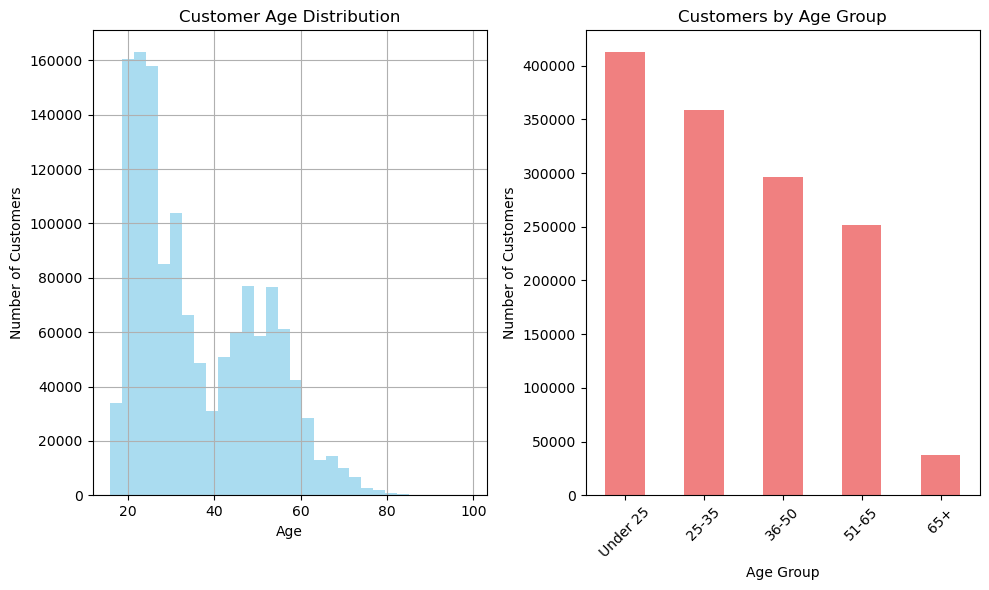

In [ ]:
customers['age_group']= pd.cut(customers['age'], 
                               bins=[0, 25, 35, 50, 65, 100], 
                               labels=['Under 25', '25-35', '36-50', '51-65', '65+'])


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
customers['age'].hist(bins=30, color='skyblue', alpha=0.7)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
age_counts.plot(kind='bar', color='lightcoral')
plt.title('Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

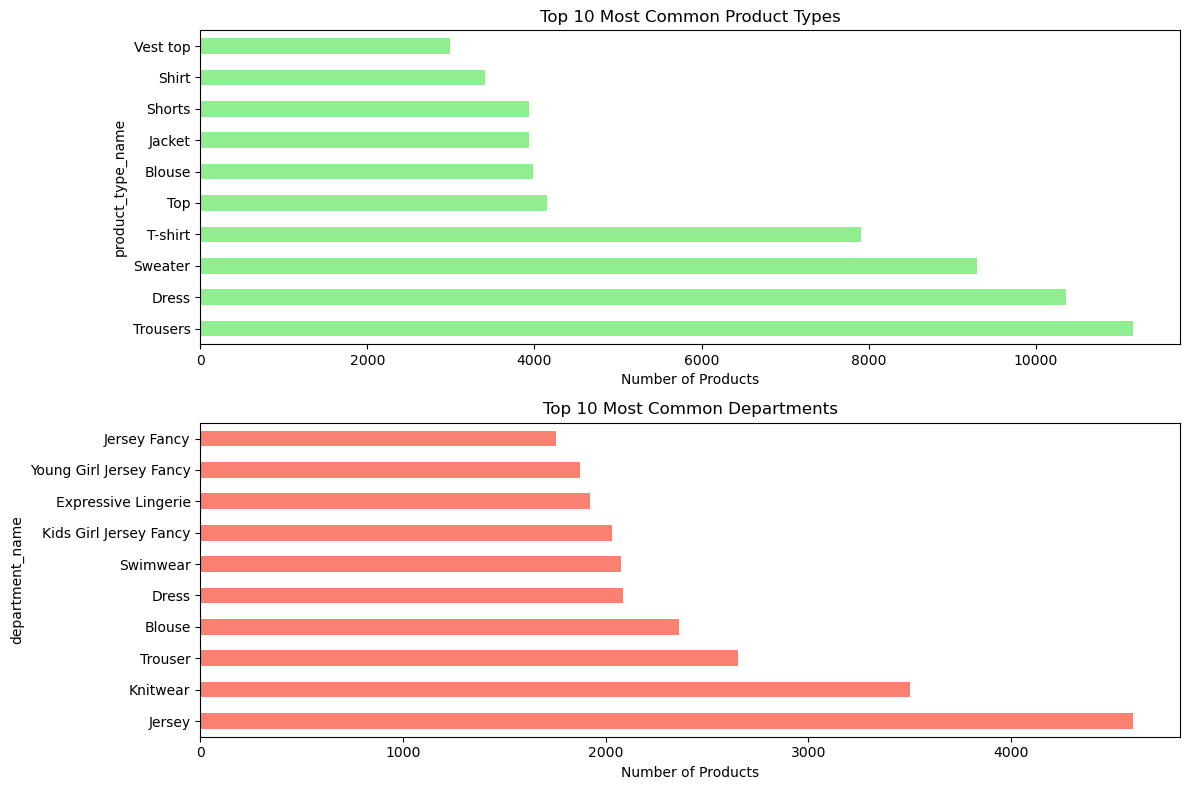

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
top_products.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Most Common Product Types')
plt.xlabel('Number of Products')

plt.subplot(2, 1, 2)
top_departments.plot(kind='barh', color='salmon')
plt.title('Top 10 Most Common Departments')
plt.xlabel('Number of Products')

plt.tight_layout()
plt.show()

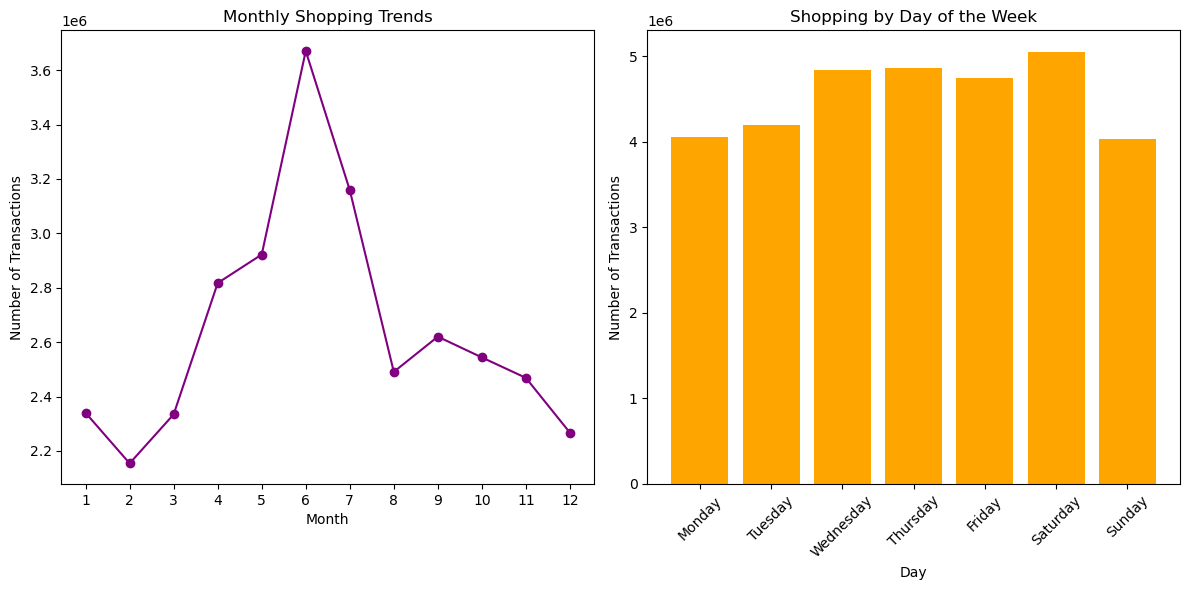

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date column to datetime format
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

# Extract year, month, and day of the week from the date
transactions['year'] = transactions['t_dat'].dt.year
transactions['month'] = transactions['t_dat'].dt.month
transactions['day'] = transactions['t_dat'].dt.day_name()

# Count transactions per month
monthly_sales = transactions['month'].value_counts().sort_index()

# Count transactions per day of the week
weekly_sales = transactions['day'].value_counts()

# Reorder the days for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(day_order)

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for monthly sales
plt.subplot(1, 2, 1)
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='purple')
plt.title("Monthly Shopping Trends")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(monthly_sales.index)

# Bar plot for weekly sales
plt.subplot(1, 2, 2)
plt.bar(weekly_sales.index, weekly_sales.values, color='orange')
plt.title("Shopping by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Customer Segments:
customer_type
Regular Customer      437746
VIP Customer          423177
Occasional Shopper    369844
One-time Buyer        131514
Name: count, dtype: int64


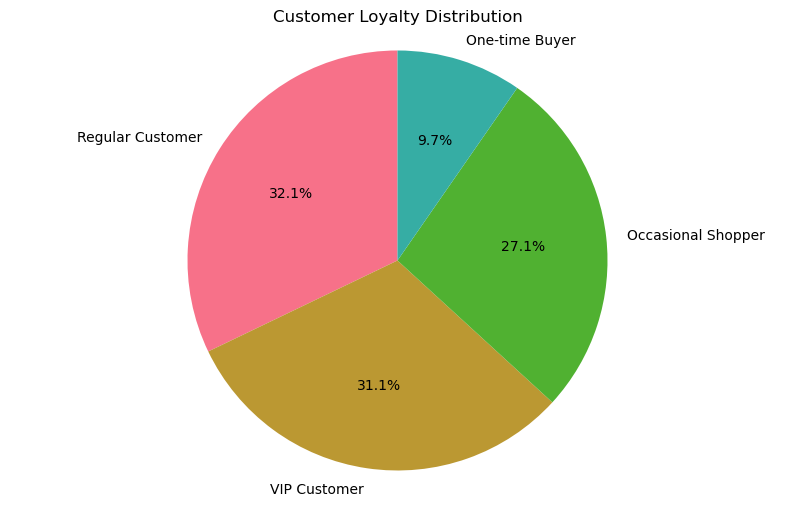


Customer Purchase Statistics:
Average purchases per customer: 23.3
Most purchases by one customer: 1895


In [10]:
# Count purchases per customer
customer_purchases = transactions.groupby('customer_id').size().reset_index(name='total_purchases')

# Categorize customers by purchase frequency
def categorize_customer(purchases):
    if purchases == 1:
        return 'One-time Buyer'
    elif purchases <= 5:
        return 'Occasional Shopper'
    elif purchases <= 20:
        return 'Regular Customer'
    else:
        return 'VIP Customer'

customer_purchases['customer_type'] = customer_purchases['total_purchases'].apply(categorize_customer)

customer_segments = customer_purchases['customer_type'].value_counts()
print("Customer Segments:")
print(customer_segments)

# Visualize customer loyalty
plt.figure(figsize=(10, 6))
plt.pie(customer_segments.values, labels=customer_segments.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Loyalty Distribution')
plt.axis('equal')
plt.show()

# Show statistics
print(f"\nCustomer Purchase Statistics:")
print(f"Average purchases per customer: {customer_purchases['total_purchases'].mean():.1f}")
print(f"Most purchases by one customer: {customer_purchases['total_purchases'].max()}")

🗓️ SEASONAL TRENDS ANALYSIS


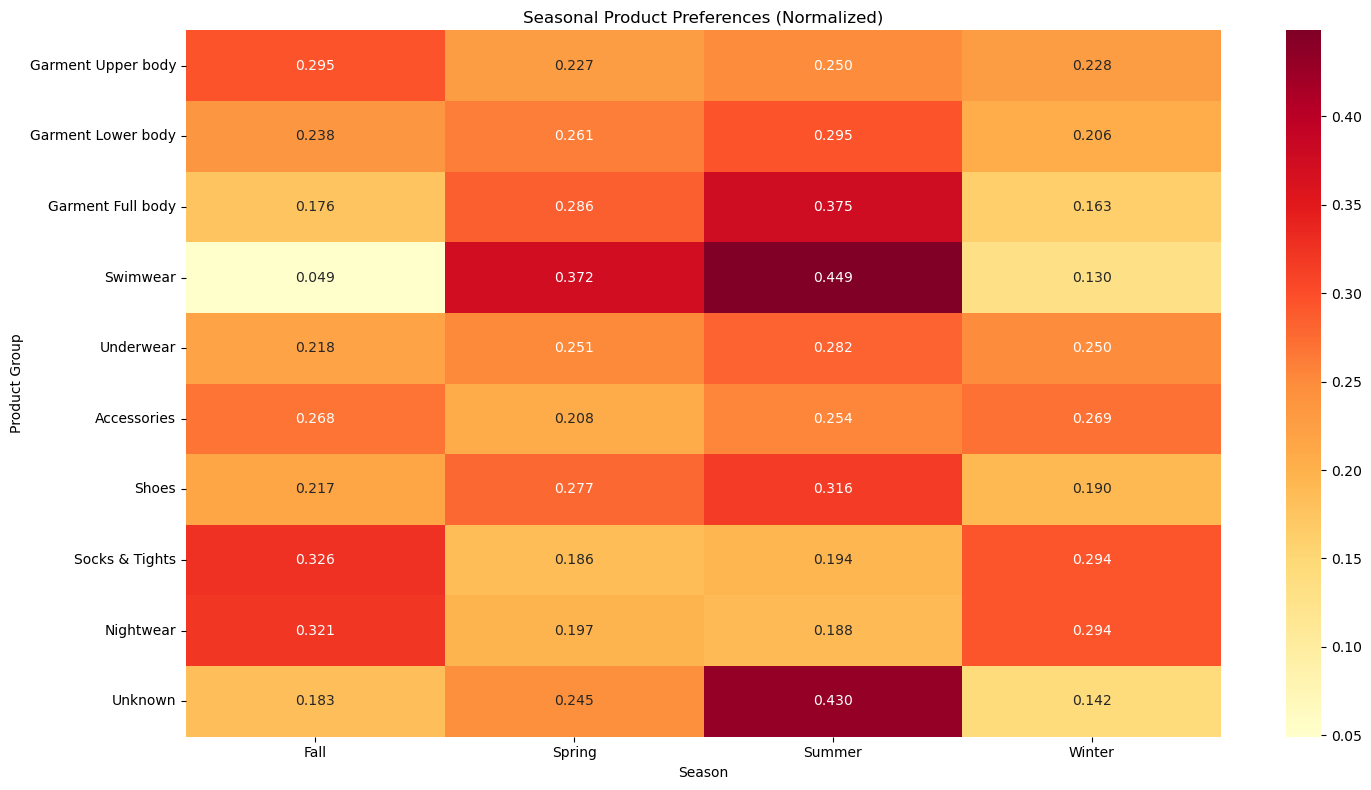

In [ ]:
print(" SEASONAL TRENDS ANALYSIS")

# Add more detailed time features
transactions['season'] = transactions['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring', 
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Analyze product categories by season
seasonal_products = transactions.merge(
    articles[['article_id', 'product_type_name', 'product_group_name']], 
    on='article_id', how='left'
)

seasonal_trends = seasonal_products.groupby(['season', 'product_group_name']).size().reset_index(name='purchases')
seasonal_pivot = seasonal_trends.pivot(index='product_group_name', columns='season', values='purchases').fillna(0)

# Calculate seasonal preference scores (for recommender system)
seasonal_pivot_norm = seasonal_pivot.div(seasonal_pivot.sum(axis=1), axis=0)

# Visualize seasonal trends
plt.figure(figsize=(15, 8))
top_10_products = seasonal_pivot.sum(axis=1).nlargest(10).index
seasonal_heatmap = seasonal_pivot_norm.loc[top_10_products]

sns.heatmap(seasonal_heatmap, annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('Seasonal Product Preferences (Normalized)')
plt.xlabel('Season')
plt.ylabel('Product Group')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

🎯 CUSTOMER SEGMENT ANALYSIS


/var/folders/1m/wdqr01dx2l14dyqfbkfryt7w0000gn/T/ipykernel_5165/3053725269.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_preferences = customer_transactions.groupby(['age_group', 'product_group_name']).size().reset_index(name='purchases')


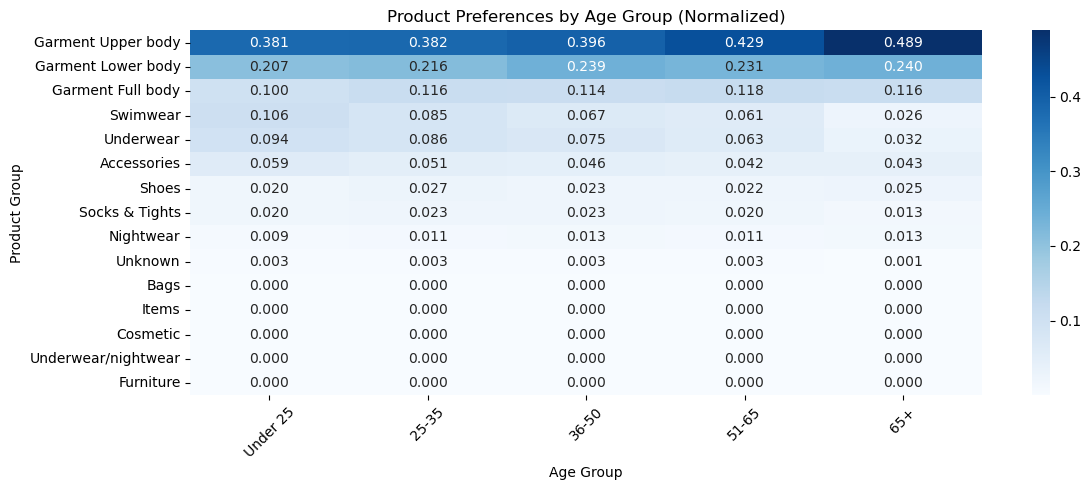

In [ ]:
print("CUSTOMER SEGMENT ANALYSIS")

# Merge customer data with transactions for demographic analysis
customer_transactions = transactions.merge(customers, on='customer_id', how='left')
customer_transactions = customer_transactions.merge(
    articles[['article_id', 'product_type_name', 'product_group_name', 'department_name']], 
    on='article_id', how='left'
)

# Analyze preferences by age group
age_preferences = customer_transactions.groupby(['age_group', 'product_group_name']).size().reset_index(name='purchases')
age_preference_pivot = age_preferences.pivot(index='product_group_name', columns='age_group', values='purchases').fillna(0)

# Normalize to see relative preferences
age_preference_norm = age_preference_pivot.div(age_preference_pivot.sum(axis=0), axis=1)

# Create preference matrix for recommender system
plt.figure(figsize=(12, 5))
top_products_age = age_preference_pivot.sum(axis=1).nlargest(15).index
age_heatmap = age_preference_norm.loc[top_products_age]

sns.heatmap(age_heatmap, annot=True, cmap='Blues', fmt='.3f')
plt.title('Product Preferences by Age Group (Normalized)')
plt.xlabel('Age Group')
plt.ylabel('Product Group')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()